In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl  
from datetime import datetime, timedelta 
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

## 연도별 토지 거래분석 

In [2]:
land=pd.read_csv('./Data/12.세종시_토지(매매)_실거래가.csv',thousands = ',')
land

,시군구,지목,용도지역,도로조건,계약년월,계약일,계약면적(㎡),거래금액(만원),지분구분,해제사유발생일
0,세종특별자치시 전동면 보덕리,임야,농림지역,-,201801,1,331.0,1050,지분,NaN
1,세종특별자치시 전동면 봉대리,임야,농림지역,-,201801,1,330.0,1190,지분,NaN
2,세종특별자치시 전동면 송정리,임야,농림지역,-,201801,1,331.0,1290,지분,NaN
3,세종특별자치시 전동면 송정리,임야,농림지역,-,201801,1,2645.0,10320,지분,NaN
4,세종특별자치시 장군면 은용리,임야,농림지역,-,201801,1,1652.0,11450,지분,NaN
...,...,...,...,...,...,...,...,...,...,...
35672,세종특별자치시 전의면 신방리,과수원,계획관리지역,8m미만,201712,30,155.0,3525,지분,NaN
35673,세종특별자치시 전의면 신방리,과수원,계획관리지역,8m미만,201712,30,199.0,4500,지분,NaN
35674,세종특별자치시 전의면 신방리,과수원,계획관리지역,8m미만,201712,30,324.0,4998,지분,NaN
35675,세종특별자치시 전의면 신방리,과수원,계획관리지역,8m미만,201712,30,30.0,459,지분,NaN


In [3]:
land['count']=1 
land['거래금액(만원)'].astype(int) 
land['계약년월']=land['계약년월'].astype(str) 
land.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35677 entries, 0 to 35676
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       35677 non-null  object 
 1   지목        35677 non-null  object 
 2   용도지역      35653 non-null  object 
 3   도로조건      35677 non-null  object 
 4   계약년월      35677 non-null  object 
 5   계약일       35677 non-null  int64  
 6   계약면적(㎡)   35677 non-null  float64
 7   거래금액(만원)  35677 non-null  int64  
 8   지분구분      35677 non-null  object 
 9   해제사유발생일   681 non-null    float64
 10  count     35677 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 3.0+ MB


In [4]:
land['계약년월']=land['계약년월'].replace('(2017.*)','2017',regex=True)  
land['계약년월']=land['계약년월'].replace('(2018.*)','2018',regex=True) 
land['계약년월']=land['계약년월'].replace('(2019.*)','2019',regex=True) 
land['계약년월']=land['계약년월'].replace('(2020.*)','2020',regex=True)  

In [5]:
land_year=land.groupby(['계약년월']).sum().rename({'count':'거래량'},axis='columns').reset_index()
land_year.drop(['해제사유발생일','계약일','계약면적(㎡)'],axis=1,inplace=True)  
land_year

,계약년월,거래금액(만원),거래량
0,2017,94467643,6858
1,2018,119155435,9541
2,2019,121601021,7989
3,2020,183967122,11289


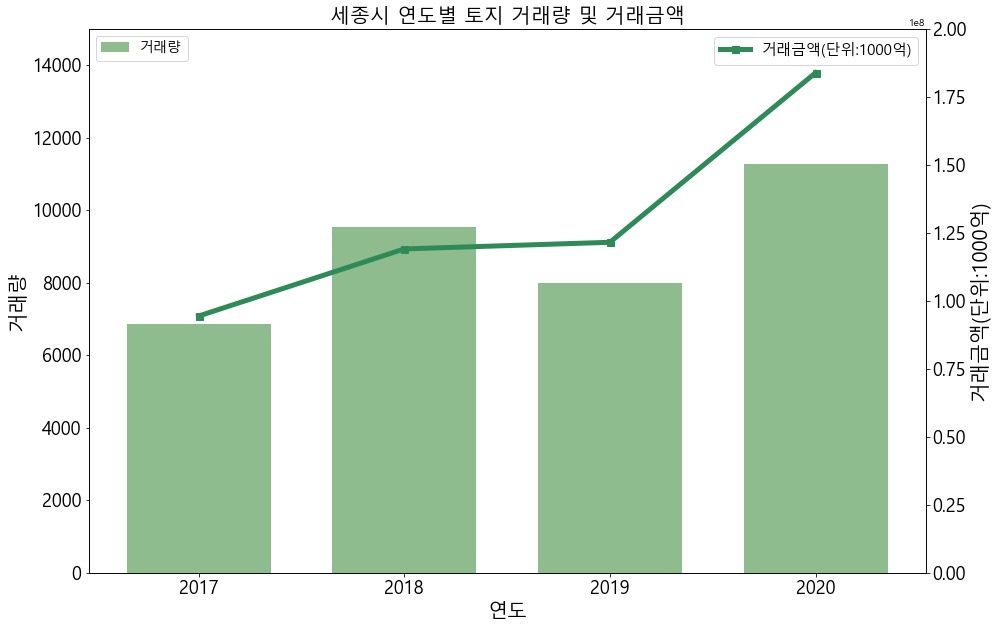

In [6]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()  
plt.yticks(fontsize=18)  
ax.bar(land_year['계약년월'], land_year['거래량'], 
        color='darkseagreen',  label='거래량',  width=0.7)
ax.set_ylabel('거래량',fontsize=20)
ax.set_xlabel('연도',fontsize=20)
plt.title('세종시 연도별 토지 거래량 및 거래금액',fontsize=20)
plt.grid(False) 
plt.xticks(fontsize=18) 
plt.legend(loc='upper left',fontsize=14)
plt.ylim([0,15000])


ax1 = ax.twinx()
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18) 
plt.grid(False)
ax1.plot(land_year['계약년월'], land_year['거래금액(만원)'], '-s', label='거래금액(단위:1000억)', 
         color='seagreen', markersize=7, linewidth=5)
ax1.set_ylabel('거래금액(단위:1000억)',fontsize=20) 
plt.ylim([0,200000000])
plt.legend(fontsize=15)
plt.show() 

## 월별 토지거래 분석 

In [7]:
land=pd.read_csv('./Data/12.세종시_토지(매매)_실거래가.csv',thousands = ',')
land['count']=1 
land['거래금액(만원)'].astype(int) 
land['계약년월']=land['계약년월'].astype(str) 
land_month=land.groupby(['계약년월']).sum().rename({'count':'거래량'},axis='columns').reset_index()
land_month.drop(['해제사유발생일','계약일','계약면적(㎡)'],axis=1,inplace=True)  
land_month  

,계약년월,거래금액(만원),거래량
0,201701,6835285,384
1,201702,5123096,461
2,201703,7885552,550
3,201704,6444190,451
4,201705,5961594,437
5,201706,8691305,685
6,201707,9655762,724
7,201708,7578252,600
8,201709,7773632,528
9,201710,7849193,509


In [8]:
values=['2017','','','','','','','','','','','',
       '2018','','','','','','','','','','','',
       '2019','','','','','','','','','','','',
       '2020','','','','','','','','','','',''] 

NameError: name 'np' is not defined

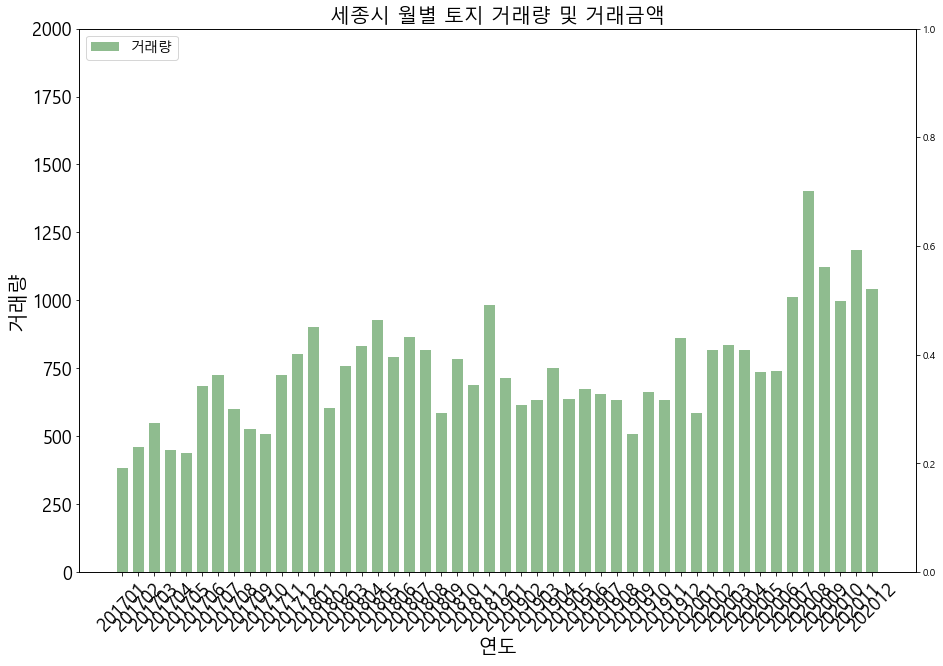

In [9]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()  
plt.yticks(fontsize=18)  
ax.bar(land_month['계약년월'], land_month['거래량'], 
        color='darkseagreen',  label='거래량',  width=0.7)
ax.set_ylabel('거래량',fontsize=20)
ax.set_xlabel('연도',fontsize=20)
plt.title('세종시 월별 토지 거래량 및 거래금액',fontsize=20)
plt.grid(False) 
plt.ylim([0,2000])
plt.xticks(fontsize=18,rotation=45,)  
plt.legend(loc='upper left',fontsize=14)

ax1 = ax.twinx()
plt.xticks(np.arange(0, 48) ,['2017','','','','','','','','','','','',
       '2018','','','','','','','','','','','',
       '2019','','','','','','','','','','','',
       '2020','','','','','','','','','','',''],fontsize=18)  
plt.yticks(fontsize=18) 
plt.grid(False)
ax1.plot(land_month['계약년월'], land_month['거래금액(만원)'], '-s', label='거래금액(단위:100억)', 
         color='seagreen', markersize=7, linewidth=5)
ax1.set_xlabel('연도',fontsize=20)
ax1.set_ylabel('거래금액(단위:100억)',fontsize=20) 
plt.legend(fontsize=15)
plt.show() 

### 토지거래량 상위 4개 시군구 분석 

In [10]:
land  

,시군구,지목,용도지역,도로조건,계약년월,계약일,계약면적(㎡),거래금액(만원),지분구분,해제사유발생일,count
0,세종특별자치시 전동면 보덕리,임야,농림지역,-,201801,1,331.0,1050,지분,NaN,1
1,세종특별자치시 전동면 봉대리,임야,농림지역,-,201801,1,330.0,1190,지분,NaN,1
2,세종특별자치시 전동면 송정리,임야,농림지역,-,201801,1,331.0,1290,지분,NaN,1
3,세종특별자치시 전동면 송정리,임야,농림지역,-,201801,1,2645.0,10320,지분,NaN,1
4,세종특별자치시 장군면 은용리,임야,농림지역,-,201801,1,1652.0,11450,지분,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
35672,세종특별자치시 전의면 신방리,과수원,계획관리지역,8m미만,201712,30,155.0,3525,지분,NaN,1
35673,세종특별자치시 전의면 신방리,과수원,계획관리지역,8m미만,201712,30,199.0,4500,지분,NaN,1
35674,세종특별자치시 전의면 신방리,과수원,계획관리지역,8m미만,201712,30,324.0,4998,지분,NaN,1
35675,세종특별자치시 전의면 신방리,과수원,계획관리지역,8m미만,201712,30,30.0,459,지분,NaN,1


In [11]:
land['시군구']=land['시군구'].replace('(세종특별자치시 고운동.*)','세종특별자치시 고운동',regex=True)  
land['시군구']=land['시군구'].replace('(세종특별자치시 금남면.*)','세종특별자치시 금남면',regex=True)
land['시군구']=land['시군구'].replace('(세종특별자치시 전의면.*)','세종특별자치시 전의면',regex=True) 
land['시군구']=land['시군구'].replace('(세종특별자치시 연서면.*)','세종특별자치시 연서면',regex=True) 
land['시군구']=land['시군구'].replace('(세종특별자치시 연동면.*)','세종특별자치시 연동면',regex=True) 
land['시군구']=land['시군구'].replace('(세종특별자치시 부강면.*)','세종특별자치시 부강면',regex=True) 
land['시군구']=land['시군구'].replace('(세종특별자치시 조치원읍.*)','세종특별자치시 조치원읍',regex=True) 
land['시군구']=land['시군구'].replace('(세종특별자치시 연기면.*)','세종특별자치시 연기면',regex=True) 
land['시군구']=land['시군구'].replace('(세종특별자치시 전동면.*)','세종특별자치시 전동면',regex=True)
land['시군구']=land['시군구'].replace('(세종특별자치시 장군면.*)','세종특별자치시 장군면',regex=True)
land['시군구']=land['시군구'].replace('(세종특별자치시 소정면.*)','세종특별자치시 소정면',regex=True)

In [12]:
land['시군구'].unique() 

array(['세종특별자치시 전동면', '세종특별자치시 장군면', '세종특별자치시 금남면', '세종특별자치시 전의면',
       '세종특별자치시 연서면', '세종특별자치시 연기면', '세종특별자치시 연동면', '세종특별자치시 반곡동',
       '세종특별자치시 조치원읍', '세종특별자치시 부강면', '세종특별자치시 소정면', '세종특별자치시 고운동',
       '세종특별자치시 아름동', '세종특별자치시 도담동', '세종특별자치시 한솔동', '세종특별자치시 다정동',
       '세종특별자치시 소담동', '세종특별자치시 보람동', '세종특별자치시 집현동', '세종특별자치시 대평동',
       '세종특별자치시 해밀동', '세종특별자치시 어진동', '세종특별자치시 나성동', '세종특별자치시 새롬동'],
      dtype=object)

In [13]:
land['count']=1 
land=land.groupby(['시군구']).sum()
land=land.sort_values('count',ascending=False).reset_index().rename({'count':'거래량'},axis='columns')
land_4=land.loc[:3]
land_4 

,시군구,계약일,계약면적(㎡),거래금액(만원),해제사유발생일,거래량
0,세종특별자치시 전의면,114280,6792707.68,45872754,1.515112e+09,7218
1,세종특별자치시 장군면,97821,4899083.63,85323058,3.676858e+09,6119
2,세종특별자치시 전동면,88503,7316973.80,29939166,1.535308e+09,5602
3,세종특별자치시 연서면,73852,5192321.35,62719200,1.515262e+09,4759


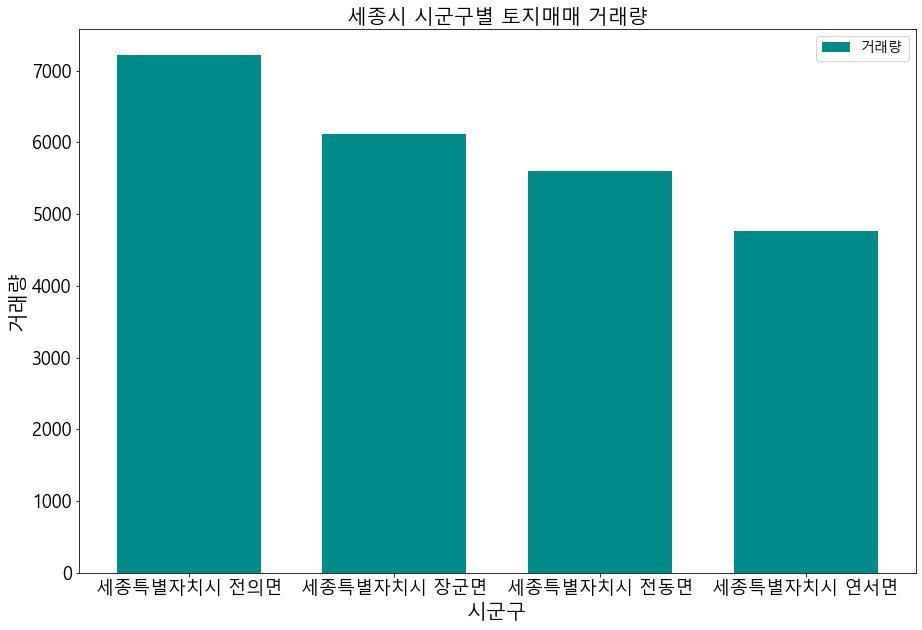

In [14]:
plt.figure(figsize=(15,10))
plt.bar(land_4['시군구'], land_4['거래량'], 
        color='darkcyan',  label='거래량',  width=0.7)
plt.ylabel('거래량',fontsize=20)
plt.xlabel('시군구',fontsize=20)
plt.title('세종시 시군구별 토지매매 거래량',fontsize=20)
plt.grid(False) 
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
plt.legend(loc='upper right',fontsize=14)
plt.show() 

## 토지유형별 거래량 분석  
### 전:밭, 답:논, 임야:산, 대지:건물을 지을수 있는곳 

In [15]:
land=pd.read_csv('Data/12.세종시_토지(매매)_실거래가.csv',thousands = ',')
land['거래량']=1
land_gimok=land.groupby(['지목']).sum().sort_values('거래량',ascending=False).reset_index()
land_gimok=land_gimok[:4]
land_gimok 

,지목,계약년월,계약일,계약면적(㎡),거래금액(만원),해제사유발생일,거래량
0,임야,4045526490,315134,22286646.90,130733495,5.535367e+09,20040
1,답,835713328,66433,5288596.88,98107426,1.818232e+09,4140
2,전,834302759,64916,3348906.72,72514891,2.242411e+09,4133
3,대,654856234,53773,1957427.89,157525205,1.313127e+09,3244


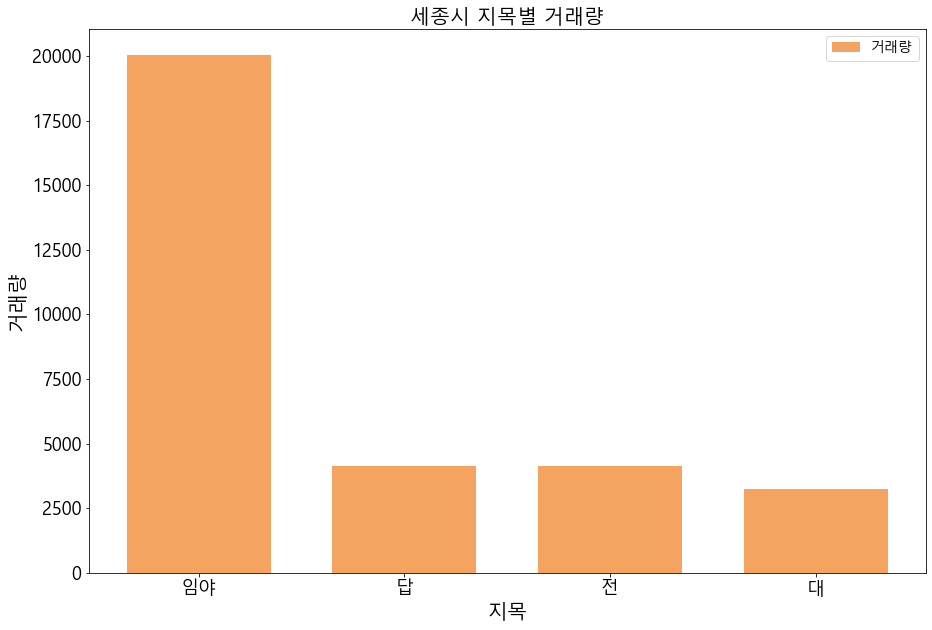

In [16]:
plt.figure(figsize=(15,10))
plt.bar(land_gimok['지목'], land_gimok['거래량'], 
        color='sandybrown',  label='거래량',  width=0.7)
plt.ylabel('거래량',fontsize=20)
plt.xlabel('지목',fontsize=20)
plt.title('세종시 지목별 거래량',fontsize=20)
plt.grid(False) 
plt.xticks(fontsize=18)   
plt.yticks(fontsize=18) 
plt.legend(loc='upper right',fontsize=14)
plt.show() 